In [10]:
import os
import fnmatch

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits, ascii
from astropy.table import Table

import astropy.units as u

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 18,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

In [28]:
def errJy_to_errABmag(flux_Jy, fluxerr_Jy):
    return -2.5 / (flux_Jy * np.log(10)) * fluxerr_Jy

## Spectroscopic calibration sample

In [3]:
satsData = ascii.read('/data2/lsajkov/mpdg/data/SAGA_public/saga_stage2_sats.csv')

In [1]:
def thorn_crit1(r_mag, r_magerr,
                gr_col, gr_covar_err): #thornton+23 criterion (1)
    
    return (gr_col - gr_covar_err + 0.06 * (r_mag - 14)) < 0.9

In [5]:
def thorn_crit2(mu_eff, mu_eff_err,
                r_mag): #thornton+23 criterion (2)
    
    return (mu_eff + mu_eff_err - 0.7 * (r_mag - 14)) > 18.5

In [9]:
def mu_eff(r_mag, r_fwhm):
    return r_mag + 2.5 * np.log10(2 * np.pi * r_fwhm ** 2)

## Look at GAMA

In [29]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/GAMA_mstars_concat.fits') as hdu:
    GAMA_mstar_concat = Table(hdu[1].data)

In [30]:
GAMA_fluxJy_r = GAMA_mstar_concat['flux_err_rt'] * u.Jansky
GAMA_fluxerrJy_r = GAMA_mstar_concat['flux_rt']

GAMA_fluxJy_g = GAMA_mstar_concat['flux_gt'] * u.Jansky
GAMA_fluxerrJy_g = GAMA_mstar_concat['flux_err_gt']

GAMA_mag_r = GAMA_fluxJy_r.to(u.ABmag)
GAMA_magerr_r = errJy_to_errABmag(GAMA_fluxJy_r, GAMA_fluxerrJy_r)

GAMA_mag_g = GAMA_fluxJy_g.to(u.ABmag)
GAMA_magerr_g = errJy_to_errABmag(GAMA_fluxJy_g, GAMA_fluxerrJy_g)

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/astropy/units/function/logarithmic.py:67: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))


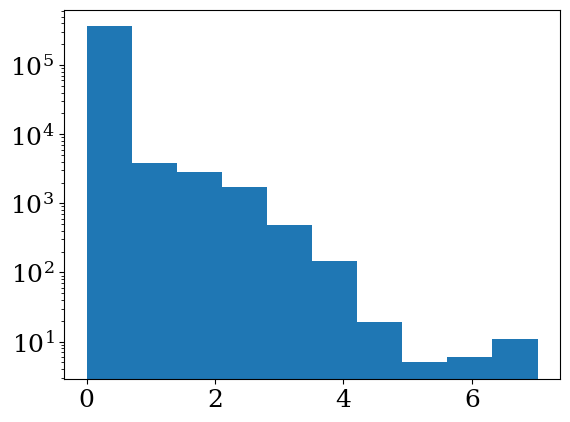

In [40]:
plt.hist(GAMA_mstar_concat[GAMA_mstar_concat['snratio'] > 25]['Z'])
plt.yscale('log')

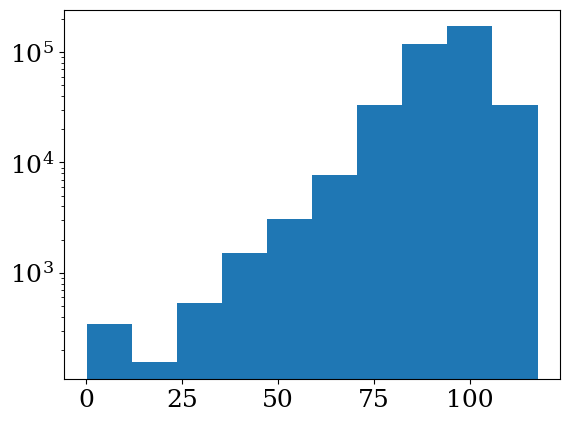

In [39]:
plt.hist(GAMA_mstar_concat['snratio'])
plt.yscale('log')

In [55]:
idx = (GAMA_mstar_concat['snratio'] > 25) &\
      (12 < GAMA_mag_r.value) & (GAMA_mag_r.value < 30)&\
      (-15 < (GAMA_mag_g.value - GAMA_mag_r.value)) & ((GAMA_mag_g.value - GAMA_mag_r.value) < 11) 

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/var/tmp/lsajkov/ipykernel_2552396/818230868.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$r_{\mathrm{AB}}$')
/var/tmp/lsajkov/ipykernel_2552396/818230868.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$(g-r)_{\mathrm{AB}}$')
/var/tmp/lsajkov/ipykernel_2552396/818230868.py:19: SyntaxWarning: invalid escape sequence '\o'
  label = 'log$(M_*/M_{\odot})$')


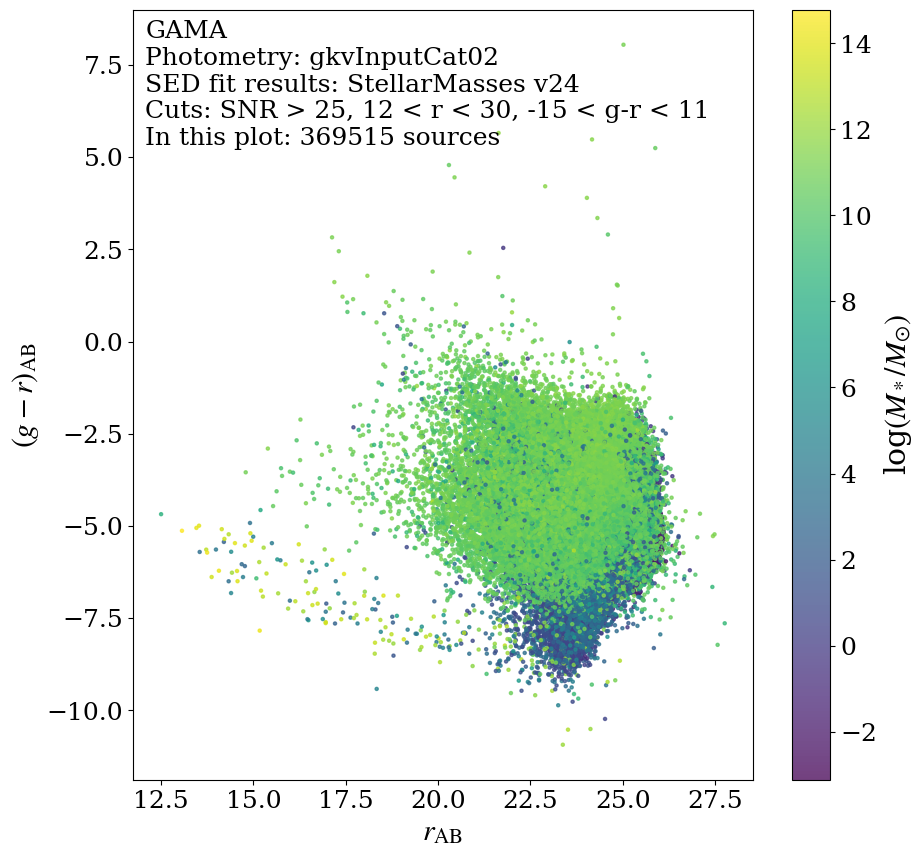

In [58]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()


 
mstar_scat = ax.scatter(GAMA_mag_r[idx], GAMA_mag_g[idx] - GAMA_mag_r[idx], 
           c = GAMA_mstar_concat[idx]['logmstar'], alpha = 0.75,
           s = 5)
# ax.set_xlim(12, 30)
# ax.set_ylim(-15, 11)

ax.set_xlabel('$r_{\mathrm{AB}}$')
ax.set_ylabel('$(g-r)_{\mathrm{AB}}$')

ax.text(0.02, 0.825, f'GAMA\nPhotometry: gkvInputCat02\nSED fit results: StellarMasses v24\nCuts: SNR > 25, 12 < r < 30, -15 < g-r < 11\nIn this plot: {np.sum(idx)} sources',
        transform = ax.transAxes)

fig.colorbar(mstar_scat,
             label = 'log$(M_*/M_{\odot})$')

fig.savefig('/data2/lsajkov/mpdg/figures/overlap_gama_kids_saga/gama_gr_r_mstar.pdf', dpi = 150)

## Look at KiDS

In [4]:
KiDS_dir = '/data2/lsajkov/mpdg/data/KiDS_spectroscopy'
KiDS_multiband_cats = fnmatch.filter(os.listdir(KiDS_dir), 'KiDS_DR4.1_*ugriZYJHKs_cat.fits')

In [5]:
import astropy.units as u

In [ ]:
for file in os.listdir(KiDS_dir):
    

In [48]:
os.listdir(KiDS_dir)

['KiDS_DR4.1_231.6_2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_170.5_-2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_161.4_-2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_225.6_2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_330.8_-27.2_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_196.5_2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_349.8_-28.2_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_234.0_1.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_194.5_2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_201.0_1.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_340.8_-28.2_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_40.6_-28.2_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_202.6_-2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_0.0_-34.1_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_169.5_-2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_354.4_-28.2_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_237.7_2.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_166.0_1.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_0.0_-31.2_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_228.0_1.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_202.0_1.5_ugriZYJHKs_cat.fits',
 'KiDS_DR4.1_159.0_1.5_ugriZYJHKs_cat.fits